In [2]:
import cv2                    
import numpy as np           
import matplotlib.pyplot as plt  


In [3]:
path = "original.jpg"

# cv2.imread() không hỗ trợ Unicode -> dùng np.fromfile() + cv2.imdecode()
img = cv2.imdecode(
    np.fromfile(path, dtype=np.uint8), 
    cv2.IMREAD_COLOR                    
)

# Chuyển sang ảnh xám (grayscale) để phát hiện cạnh
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [4]:
# ========================================
# SOBEL OPERATOR - Toán tử phát hiện cạnh Sobel
# ========================================
# - Toán tử đạo hàm bậc nhất để phát hiện cạnh

# Kernel Sobel X (phát hiện cạnh dọc):    
#   [-1  0  +1] 
#   [-2  0  +2]                            
#   [-1  0  +1]                             

# Tính gradient theo hướng X (cạnh dọc)
# cv2.Sobel(src, ddepth, dx, dy, ksize)
# - ddepth=CV_64F: kết quả float64 (cho phép giá trị âm)
# - dx=1, dy=0: đạo hàm bậc 1 theo X, bậc 0 theo Y
# - ksize=3: kích thước kernel 3×3
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)

#Kernel Sobel Y (phát hiện cạnh ngang):
#   [-1  -2  -1]
#   [ 0   0   0]
#   [+1  +2  +1]                       
# Tính gradient theo hướng Y (cạnh ngang)
# dx=0, dy=1: đạo hàm bậc 0 theo X, bậc 1 theo Y
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# Tính độ lớn gradient (magnitude) = √(Gx² + Gy²)
# cv2.magnitude(): tính độ lớn vector từ 2 thành phần X, Y
# Kết quả: ảnh cạnh tổng hợp từ cả 2 hướng
sobel = cv2.magnitude(sobel_x, sobel_y)

# - Kém chính xác với cạnh nghiêng 45° so với các hướng chính


In [5]:
# ========================================
# PREWITT OPERATOR - Toán tử phát hiện cạnh Prewitt
# ========================================
# - Toán tử đạo hàm bậc nhất đơn giản để phát hiện cạnh
# - tất cả trọng số = 1

# Định nghĩa kernel Prewitt theo hướng X (phát hiện cạnh dọc)
# Cột giữa = 0 (không đóng góp), cột trái = -1, cột phải = +1
# Phát hiện sự thay đổi độ sáng từ trái sang phải
prewitt_x = np.array([[-1, 0, 1],    
                      [-1, 0, 1],  
                      [-1, 0, 1]])   # Hàng dưới

# Định nghĩa kernel Prewitt theo hướng Y (phát hiện cạnh ngang)
# Hàng giữa = 0 (không đóng góp), hàng trên = -1, hàng dưới = +1
# Phát hiện sự thay đổi độ sáng từ trên xuống dưới
prewitt_y = np.array([[-1, -1, -1], 
                      [ 0,  0,  0],
                      [ 1,  1,  1]]) 

# Áp dụng kernel Prewitt lên ảnh xám
# cv2.filter2D(src, ddepth, kernel)
# - ddepth=-1: giữ nguyên kiểu dữ liệu của ảnh gốc
prewitt_x_img = cv2.filter2D(gray, -1, prewitt_x)  # Gradient theo X
prewitt_y_img = cv2.filter2D(gray, -1, prewitt_y)  # Gradient theo Y

# Tính độ lớn gradient tổng hợp từ cả 2 hướng
# Công thức: magnitude = √(Gx² + Gy²)
# .astype(float): chuyển sang float để tính toán chính xác
prewitt = cv2.magnitude(prewitt_x_img.astype(float), prewitt_y_img.astype(float))

# - Nhạy nhiễu hơn Sobel (không có smoothing)
# - Kém chính xác trong môi trường nhiễu



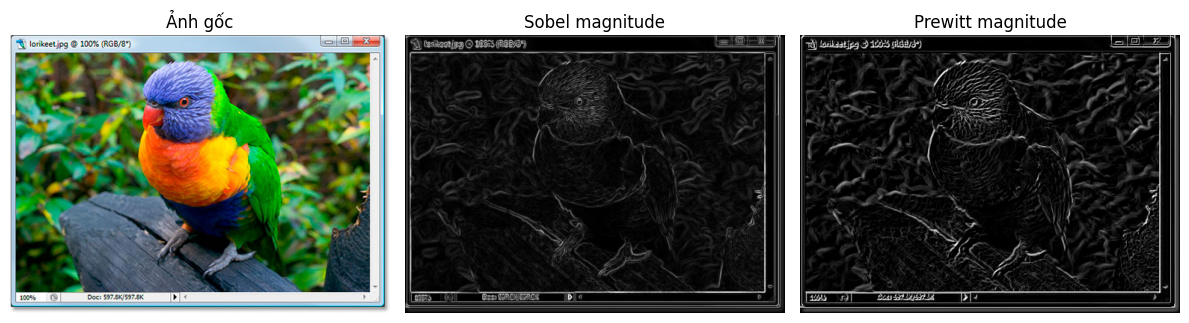

In [6]:
# ========================================
# HIỂN THỊ VÀ SO SÁNH KẾT QUẢ
# ========================================

# Tạo figure với 3 ảnh xếp ngang
plt.figure(figsize=(12, 8))

# Danh sách các ảnh cần hiển thị
# (ảnh, tiêu đề, cmap)
images = [
    (cv2.cvtColor(img, cv2.COLOR_BGR2RGB), "Ảnh gốc", None),
    (sobel, "Sobel magnitude", "gray"),
    (prewitt, "Prewitt magnitude", "gray")
]

# Vòng lặp hiển thị tất cả ảnh
for idx, (image, title, cmap) in enumerate(images, start=1):
    plt.subplot(1, 3, idx)  # 1 hàng, 3 cột
    plt.title(title)
    plt.imshow(image, cmap=cmap)
    plt.axis("off")  # Tắt trục tọa độ

# Tự động điều chỉnh khoảng cách giữa các subplot
plt.tight_layout()

# Lưu kết quả ra file PNG với độ phân giải 150 DPI
plt.savefig("edge_detection_result.png", dpi=150)

# Hiển thị figure lên màn hình
plt.show()
